# Analysis of the autism data

In [3]:
run init.ipynb

Done.


In [4]:
#df =  pd.read_csv("/Users/samperochon/Duke/work/notes_on_stats/df_all.csv")
df =  pd.read_csv("/home01/sam/df_all.csv")

df['study'] = df['path'].apply(lambda x: x.split('/')[-3] if x.split('/')[-3] in S2K_STUDIES else x.split('/')[-4])
data = Dataset(df=df, 
               missing_data_handling='encoding', 
               imputation_method='without', 
               sampling_method='without',
               outcome_column='diagnosis',
                features_name = DEFAULT_PREDICTORS, 
                scale_data=False,
                use_missing_indicator_variables=False,
               verbosity=4,
               scenario='papers',
               proportion_train=1)

Post-processing inital df (removing columns with no cva features, encoding srings, compute administrations order, compute condensed S/NS variables)... 
Removing 1459/1956 keeping only subject in studies: ['ARC', 'P1'].
Removing 12/497 keeping first admin.
Removing 26/485 keeping only subject with diagnosis: [0, 1].
459 administrations left.


,id
diagnosis,
0.0,416
1.0,43


Splitting dataset into test and train set.
Encoding 459 (train) and 0 (test) missing values with -5.
Predicting diagnosis based on 29 features
Splitting dataset into test and train set.
Encoding 459 (train) and 0 (test) missing values with -5.


# Experiments

* This section aims at answering a few questions related to the different algorithms used, with the aim of optimizing our classification framework.

**Parameters or potential settings**

* The approach used, which could be Logistic Regression, Decision Tree, Explainable Boosting Machine, Neural Additive models, or XGBoost.
* The use or not of indicator variables as inputs. 
* The scaling of the data. 
* The imputation approach when the learning algorithms does not handle them by design. It could be constant imputation (called encoding here), or conditional imputation (mean, knn, or mice).
* The sampling method in the case of imbalance learning (either no down-sampling, vanilla (random sampling of the minority class until classes are balanced), or SMOTE (a more elaborated sampling).
* The number of features, between 2 and 6. 
* The number of folds when cross-validating the results. 

**Notes on the classification pipeline:**

* Two datasets are age-matched but one (scenario `asd_td_age_matched_n_balanced`) lead to relatively balanced classes, whereas the scenario `asd_td_age_matched_n_unbalanced` has slightly younger kids and so leverage the amount of young neuro-typical kids, and is more unbalanced. 
* No searches on hyper-parameters are performed on each of the approach. Cross-validation is performed with the stratified inner-fold being left-out, the model is fitted on the training set, and the prediction of the test set is done with predictions stored for later evaluation of performances. 
* since a lot of settings parameters are tested, we test all of the hypothesis with a default setting that is: Encoding of the missing variables, scaling of the data, no use of indicator variables, no down-sampling (???), and a 16-fold cross-validation.
* Features selection were made for the two scenario suing the features with the higher importance based on xgboost importance map.
* Classification here is between autistic and neurotypical participants.



**Among the questions at stakes:**

* Experiment 1: Shall we use indicator variables? For each scenario (columns of axes), ad each dimension of the problem (rows of axes) , x is the `use_of_indicator_variables`, y is an indicator of performances (typically the F1 score), and the hue variable are the approaches. The plots are performed for no imputations, 
* Experiement 2: Shall we scale data or not ? 
* Experiment X: for the algorithms handling missing variables (xgboost, nam with encoding) , shall we let them be missing, or imputed ? 

Encoding 459 (train) and 0 (test) missing values with -5.


,AUROC,AUC-PR,AUC-PR-Gain,AUC-PR-Corrected,AUC-PR-Gain-Corrected,F1 score (2 PPVxTPR/(PPV+TPR)),F1 score Corrected,Accuracy,Matthews correlation coefficient (MCC),"Sensitivity, recall, hit rate, or true positive rate (TPR)","Specificity, selectivity or true negative rate (TNR)",Precision or positive predictive value (PPV),Negative predictive value (NPV),Miss rate or false negative rate (FNR),False discovery rate (FDR=1-PPV),False omission rate (FOR=1-NPV)
0,0.857,0.412,0.892,0.181,0.966,0.439,0.238,0.898,0.365,0.395,0.95,0.447,0.938,0.605,0.553,0.062


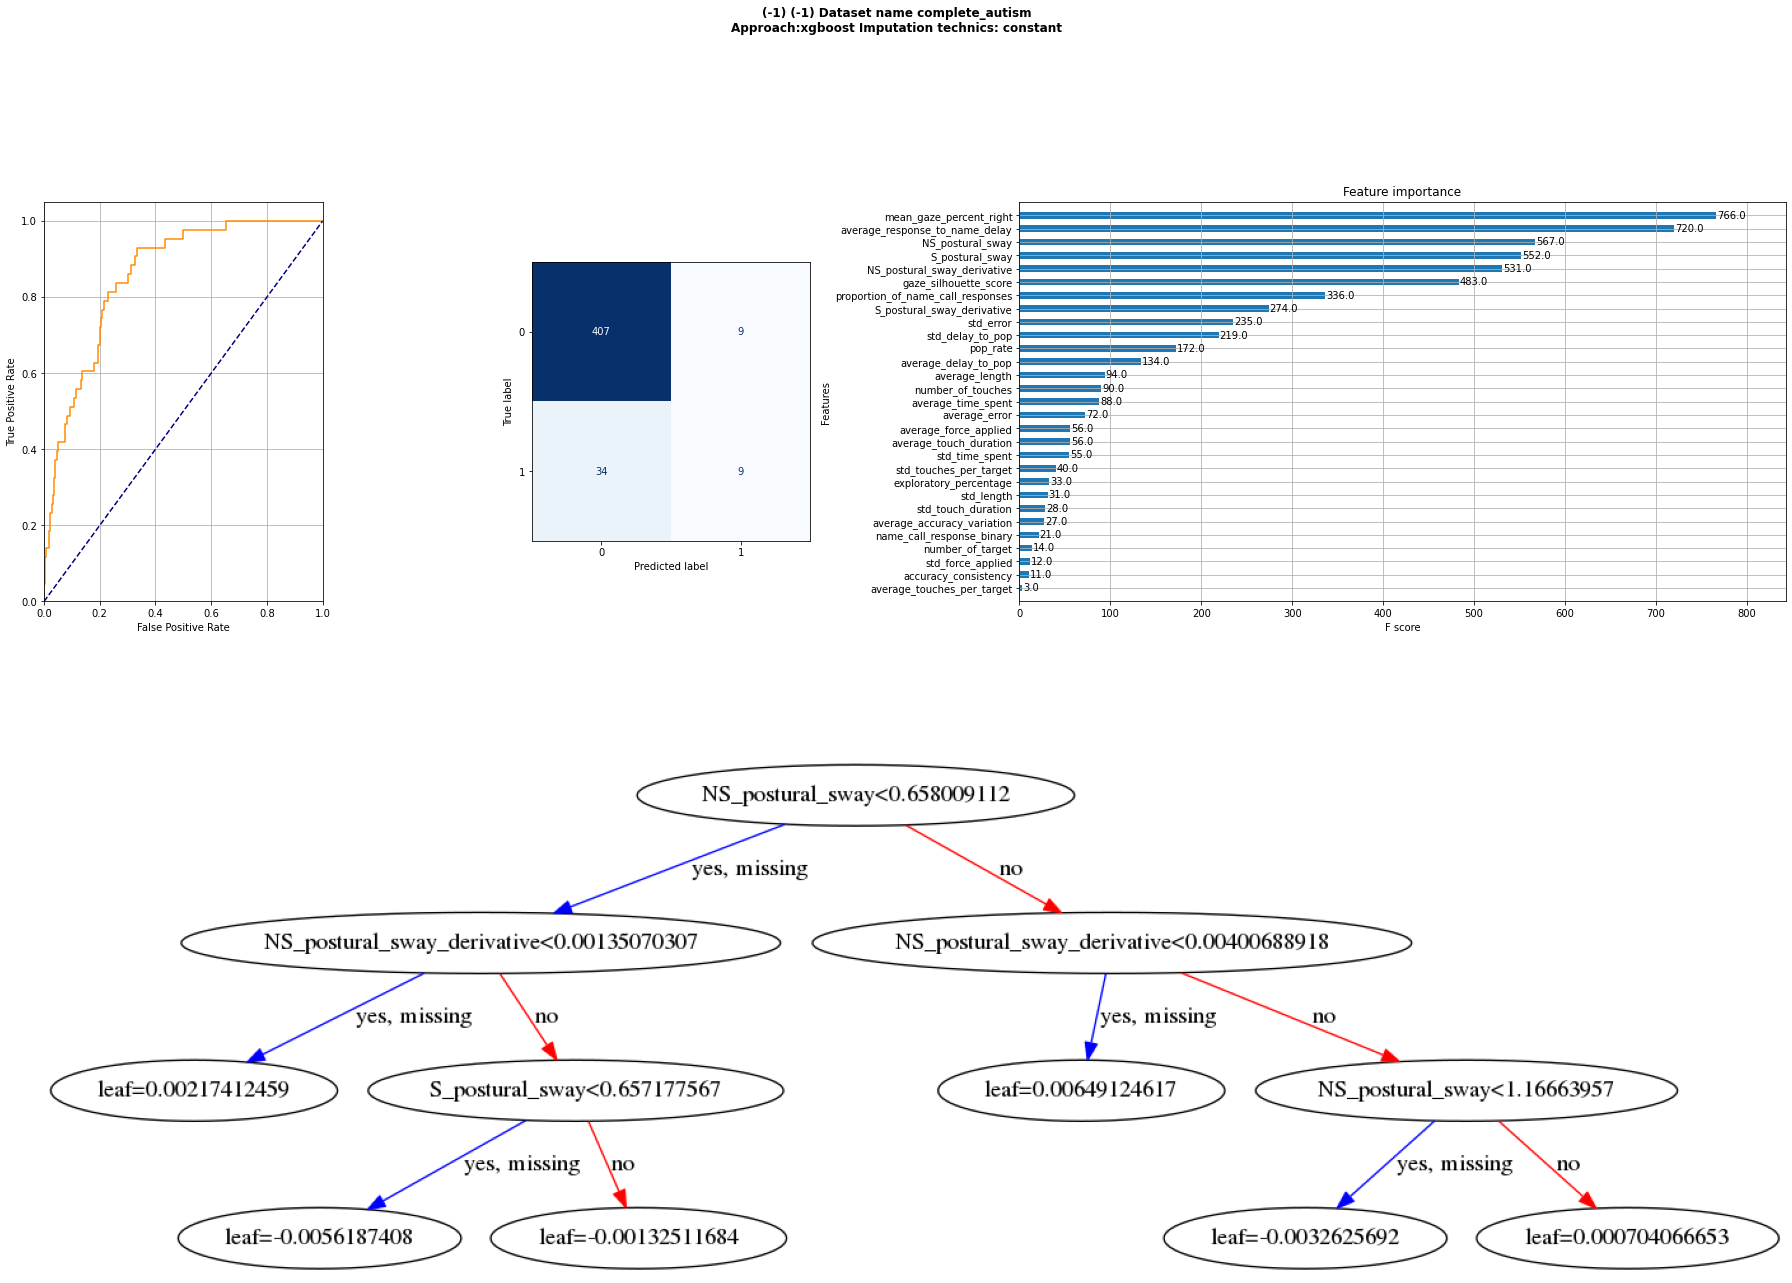

In [5]:
exp = Experiments(data.dataset_name,
                  dataset=data, 
                    approach='xgboost', 
                    previous_experiment=None,        
                    verbosity=1, 
                    debug=True, 
                    save_experiment=False)
    
exp.fit_predict(num_cv='loocv')
exp.plot()

Encoding 459 (train) and 0 (test) missing values with -5.


,AUROC,AUC-PR,AUC-PR-Gain,AUC-PR-Corrected,AUC-PR-Gain-Corrected,F1 score (2 PPVxTPR/(PPV+TPR)),F1 score Corrected,Accuracy,Matthews correlation coefficient (MCC),"Sensitivity, recall, hit rate, or true positive rate (TPR)","Specificity, selectivity or true negative rate (TNR)",Precision or positive predictive value (PPV),Negative predictive value (NPV),Miss rate or false negative rate (FNR),False discovery rate (FDR=1-PPV),False omission rate (FOR=1-NPV)
0,0.818,0.331,0.856,0.107,0.798,0.447,0.231,0.895,0.371,0.419,0.945,0.439,0.94,0.581,0.561,0.06


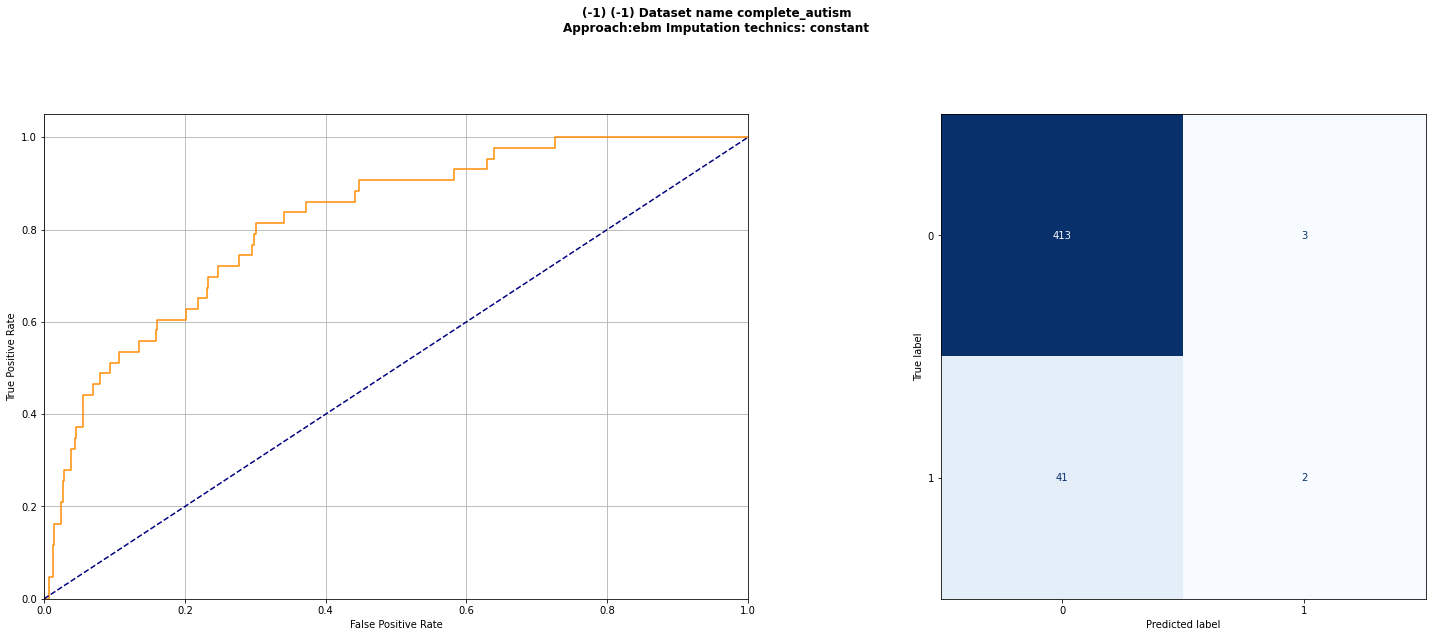

<!-- http://127.0.0.1:7331/140206303702608/ -->

In [6]:
exp = Experiments(data.dataset_name,
                  dataset=data, 
                    approach='ebm', 
                    previous_experiment=None,        
                    verbosity=1, 
                    debug=True, 
                    save_experiment=False)
    
exp.fit_predict(num_cv='loocv')
exp.plot()

## Preliminary. Feature selection based on importance map using NAM, EBM and XGBOOST

,AUROC,AUC-PR,AUC-PR-Gain,AUC-PR-Corrected,AUC-PR-Gain-Corrected,F1 score (2 PPVxTPR/(PPV+TPR)),F1 score Corrected,Accuracy,Matthews correlation coefficient (MCC),"Sensitivity, recall, hit rate, or true positive rate (TPR)","Specificity, selectivity or true negative rate (TNR)",Precision or positive predictive value (PPV),Negative predictive value (NPV),Miss rate or false negative rate (FNR),False discovery rate (FDR=1-PPV),False omission rate (FOR=1-NPV)
0,0.999,0.998,0.999,0.953,1.0,0.994,0.892,0.992,0.982,0.989,0.993,0.989,0.993,0.011,0.011,0.007


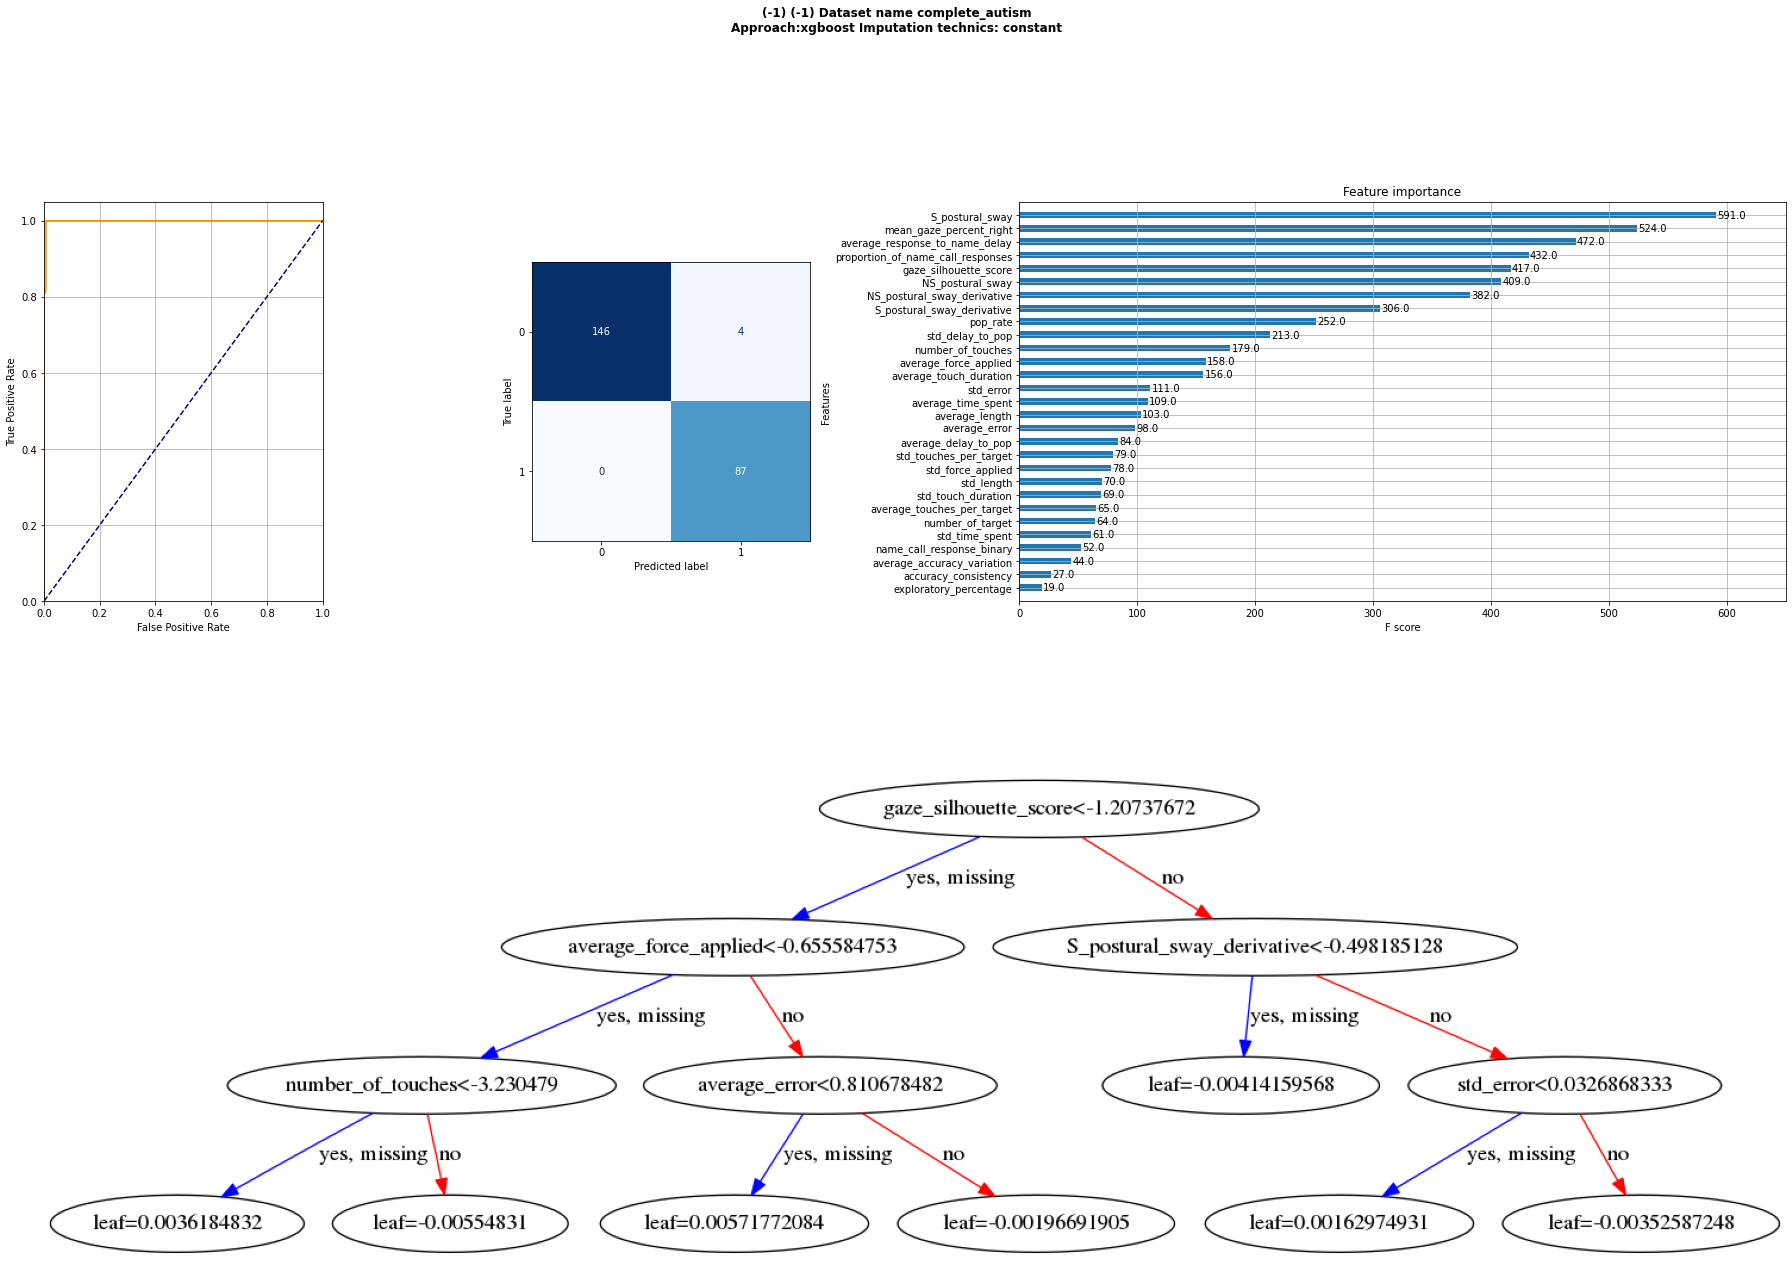

,AUROC,AUC-PR,AUC-PR-Gain,AUC-PR-Corrected,AUC-PR-Gain-Corrected,F1 score (2 PPVxTPR/(PPV+TPR)),F1 score Corrected,Accuracy,Matthews correlation coefficient (MCC),"Sensitivity, recall, hit rate, or true positive rate (TPR)","Specificity, selectivity or true negative rate (TNR)",Precision or positive predictive value (PPV),Negative predictive value (NPV),Miss rate or false negative rate (FNR),False discovery rate (FDR=1-PPV),False omission rate (FOR=1-NPV)
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.996,0.986,0.977,1.0,1.0,0.995,0.023,0.0,0.005


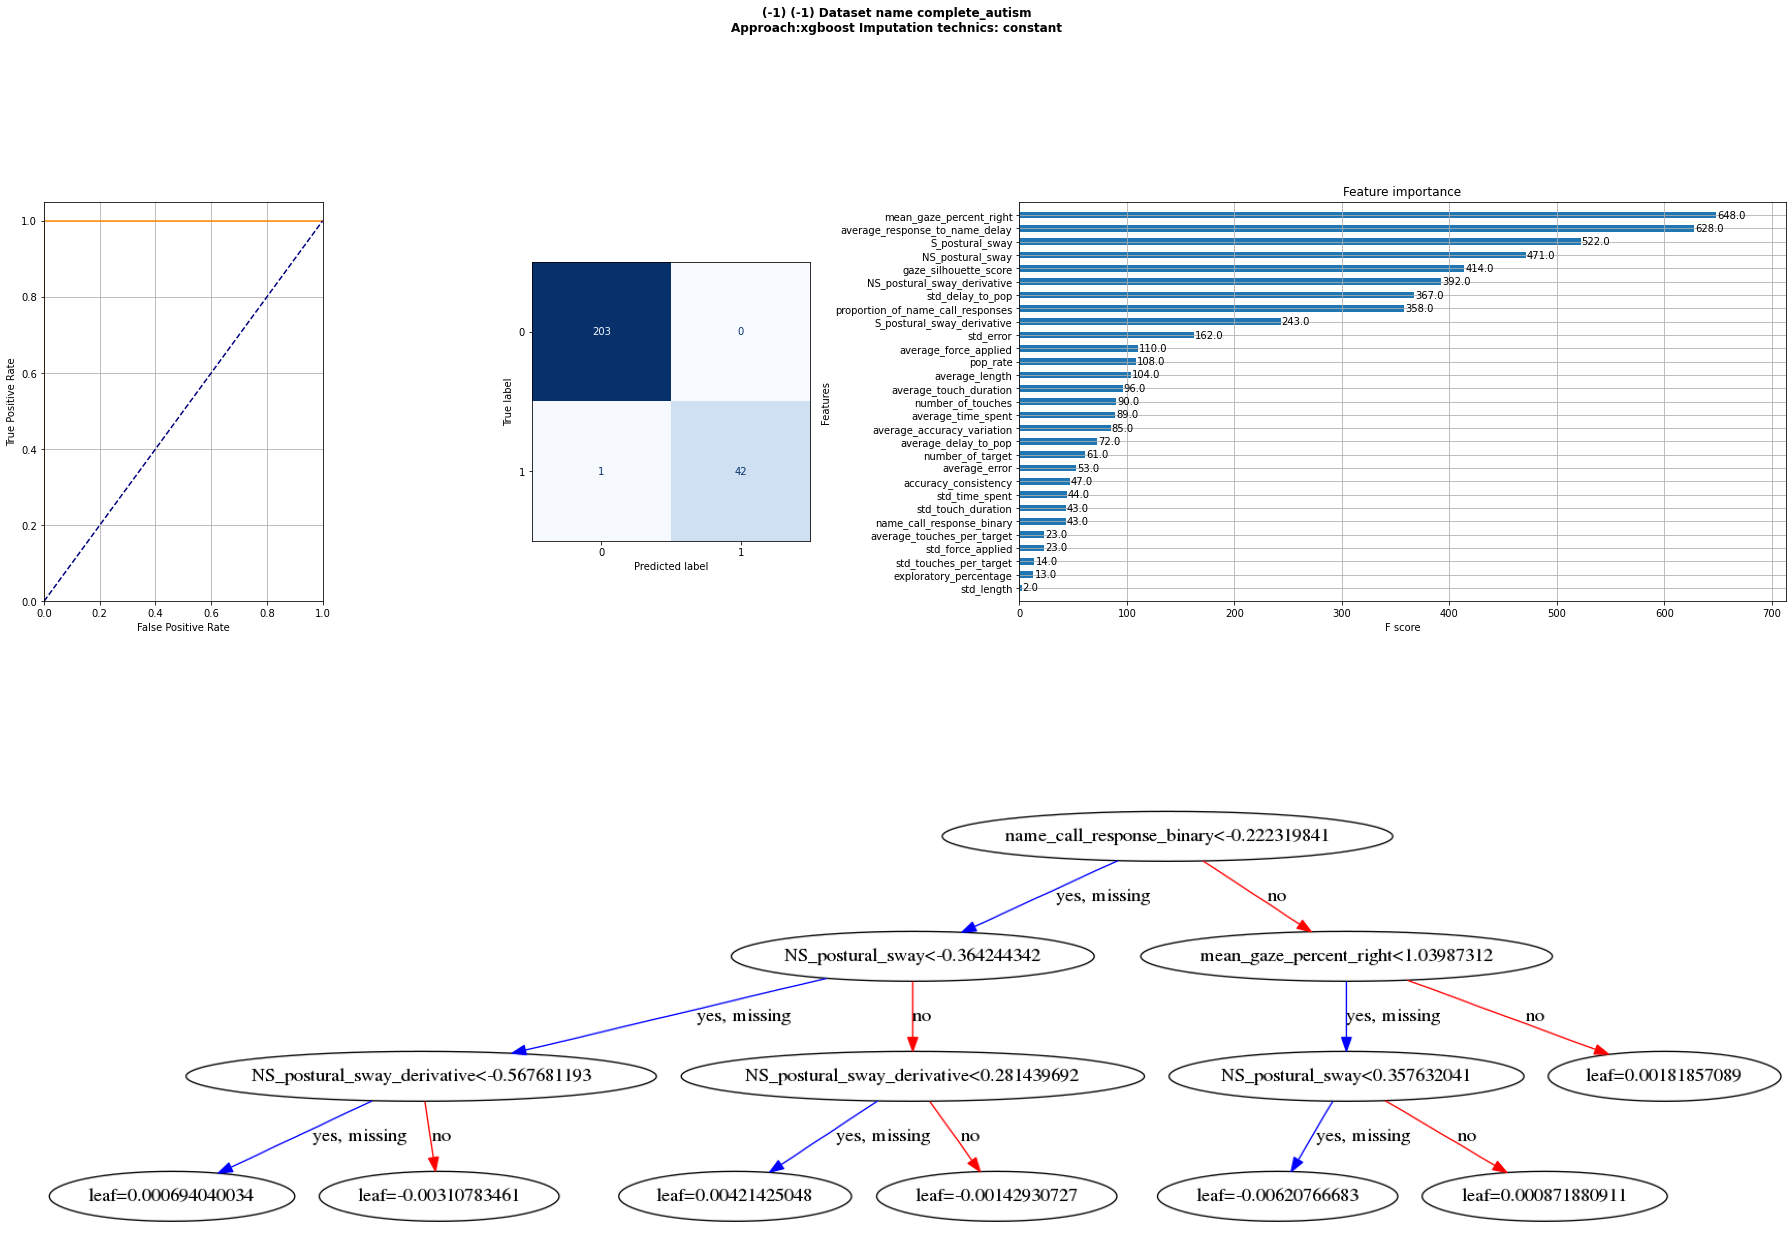

,AUROC,AUC-PR,AUC-PR-Gain,AUC-PR-Corrected,AUC-PR-Gain-Corrected,F1 score (2 PPVxTPR/(PPV+TPR)),F1 score Corrected,Accuracy,Matthews correlation coefficient (MCC),"Sensitivity, recall, hit rate, or true positive rate (TPR)","Specificity, selectivity or true negative rate (TNR)",Precision or positive predictive value (PPV),Negative predictive value (NPV),Miss rate or false negative rate (FNR),False discovery rate (FDR=1-PPV),False omission rate (FOR=1-NPV)
0,0.974,0.949,0.988,0.777,0.999,0.887,0.737,0.942,0.849,0.843,0.978,0.932,0.945,0.157,0.068,0.055


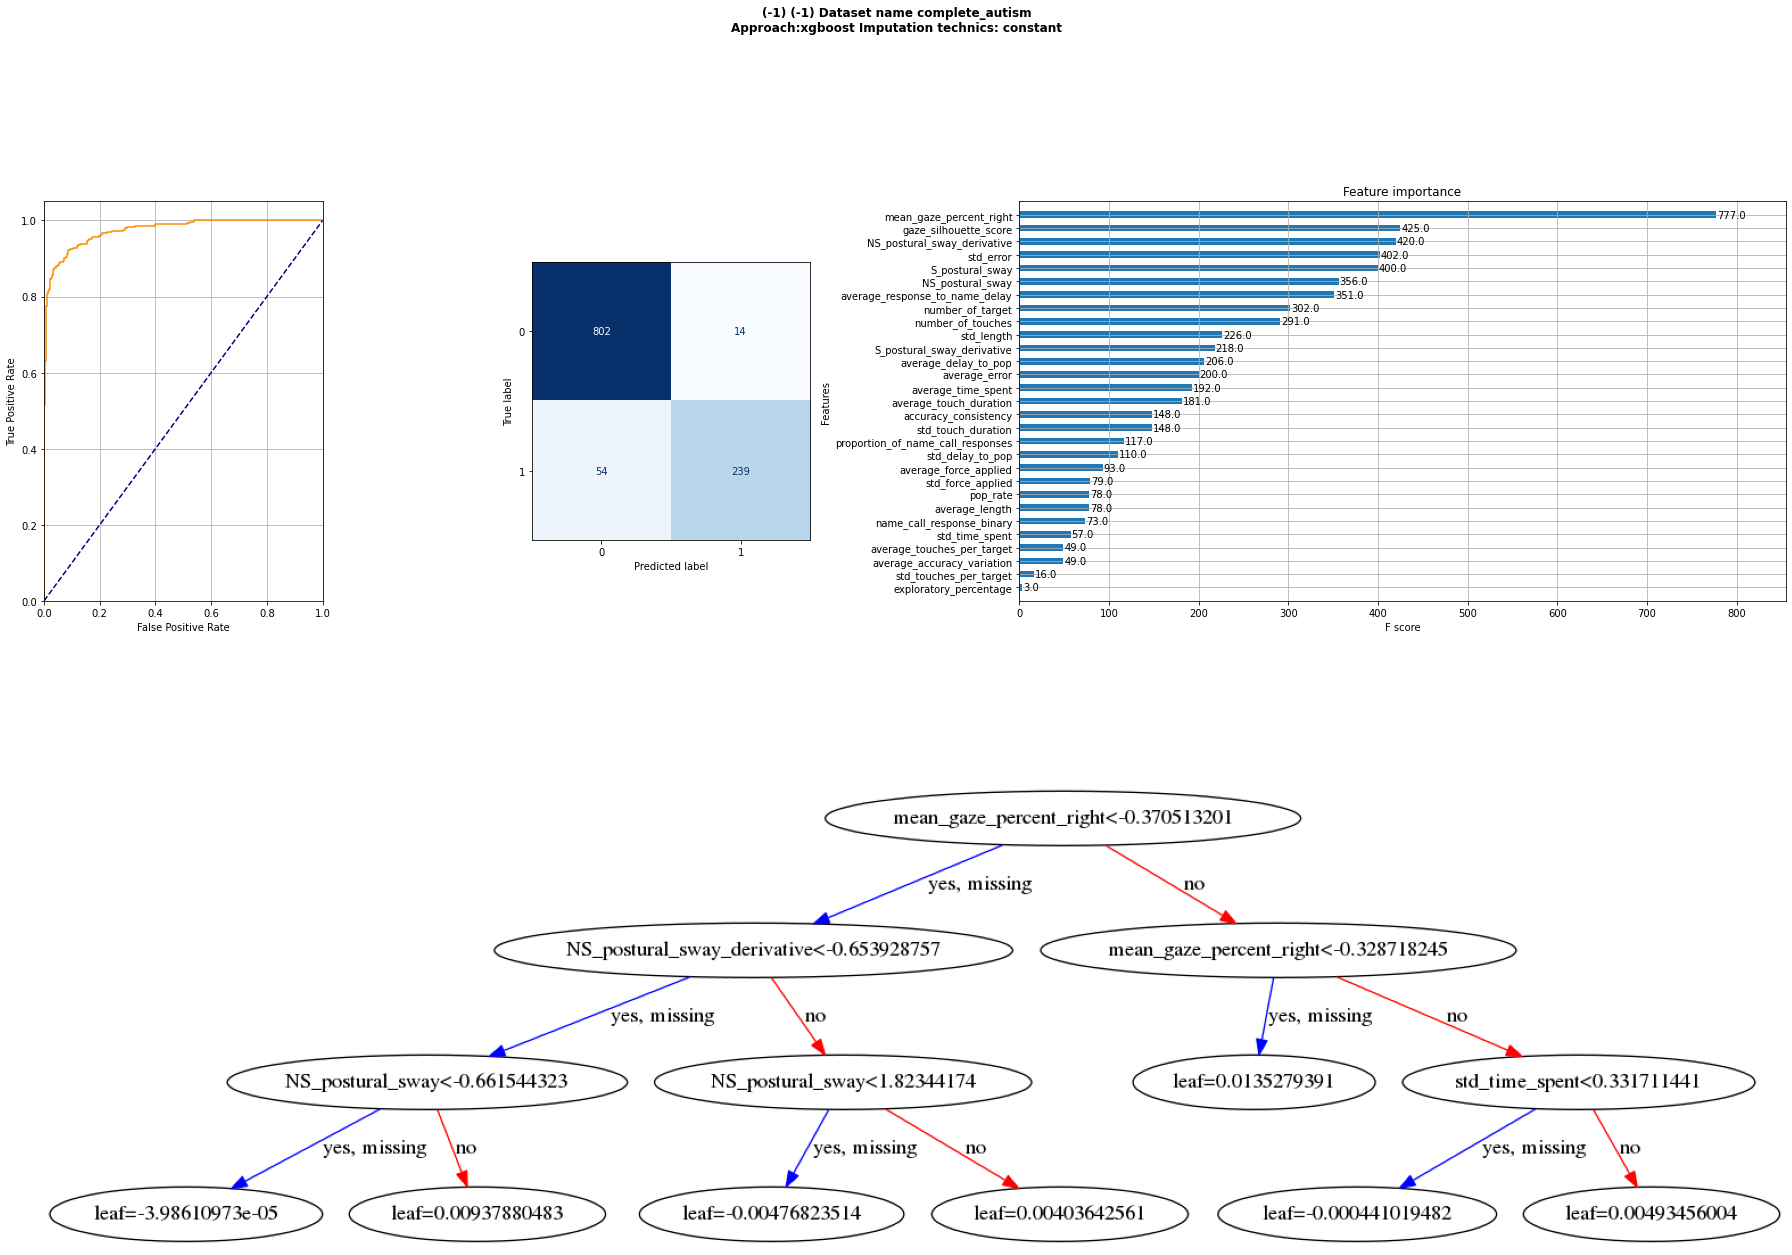

,AUROC,AUC-PR,AUC-PR-Gain,AUC-PR-Corrected,AUC-PR-Gain-Corrected,F1 score (2 PPVxTPR/(PPV+TPR)),F1 score Corrected,Accuracy,Matthews correlation coefficient (MCC),"Sensitivity, recall, hit rate, or true positive rate (TPR)","Specificity, selectivity or true negative rate (TNR)",Precision or positive predictive value (PPV),Negative predictive value (NPV),Miss rate or false negative rate (FNR),False discovery rate (FDR=1-PPV),False omission rate (FOR=1-NPV)
0,0.999,0.999,0.999,0.974,1.0,0.978,0.977,0.973,0.947,0.991,0.956,0.957,0.991,0.009,0.043,0.009


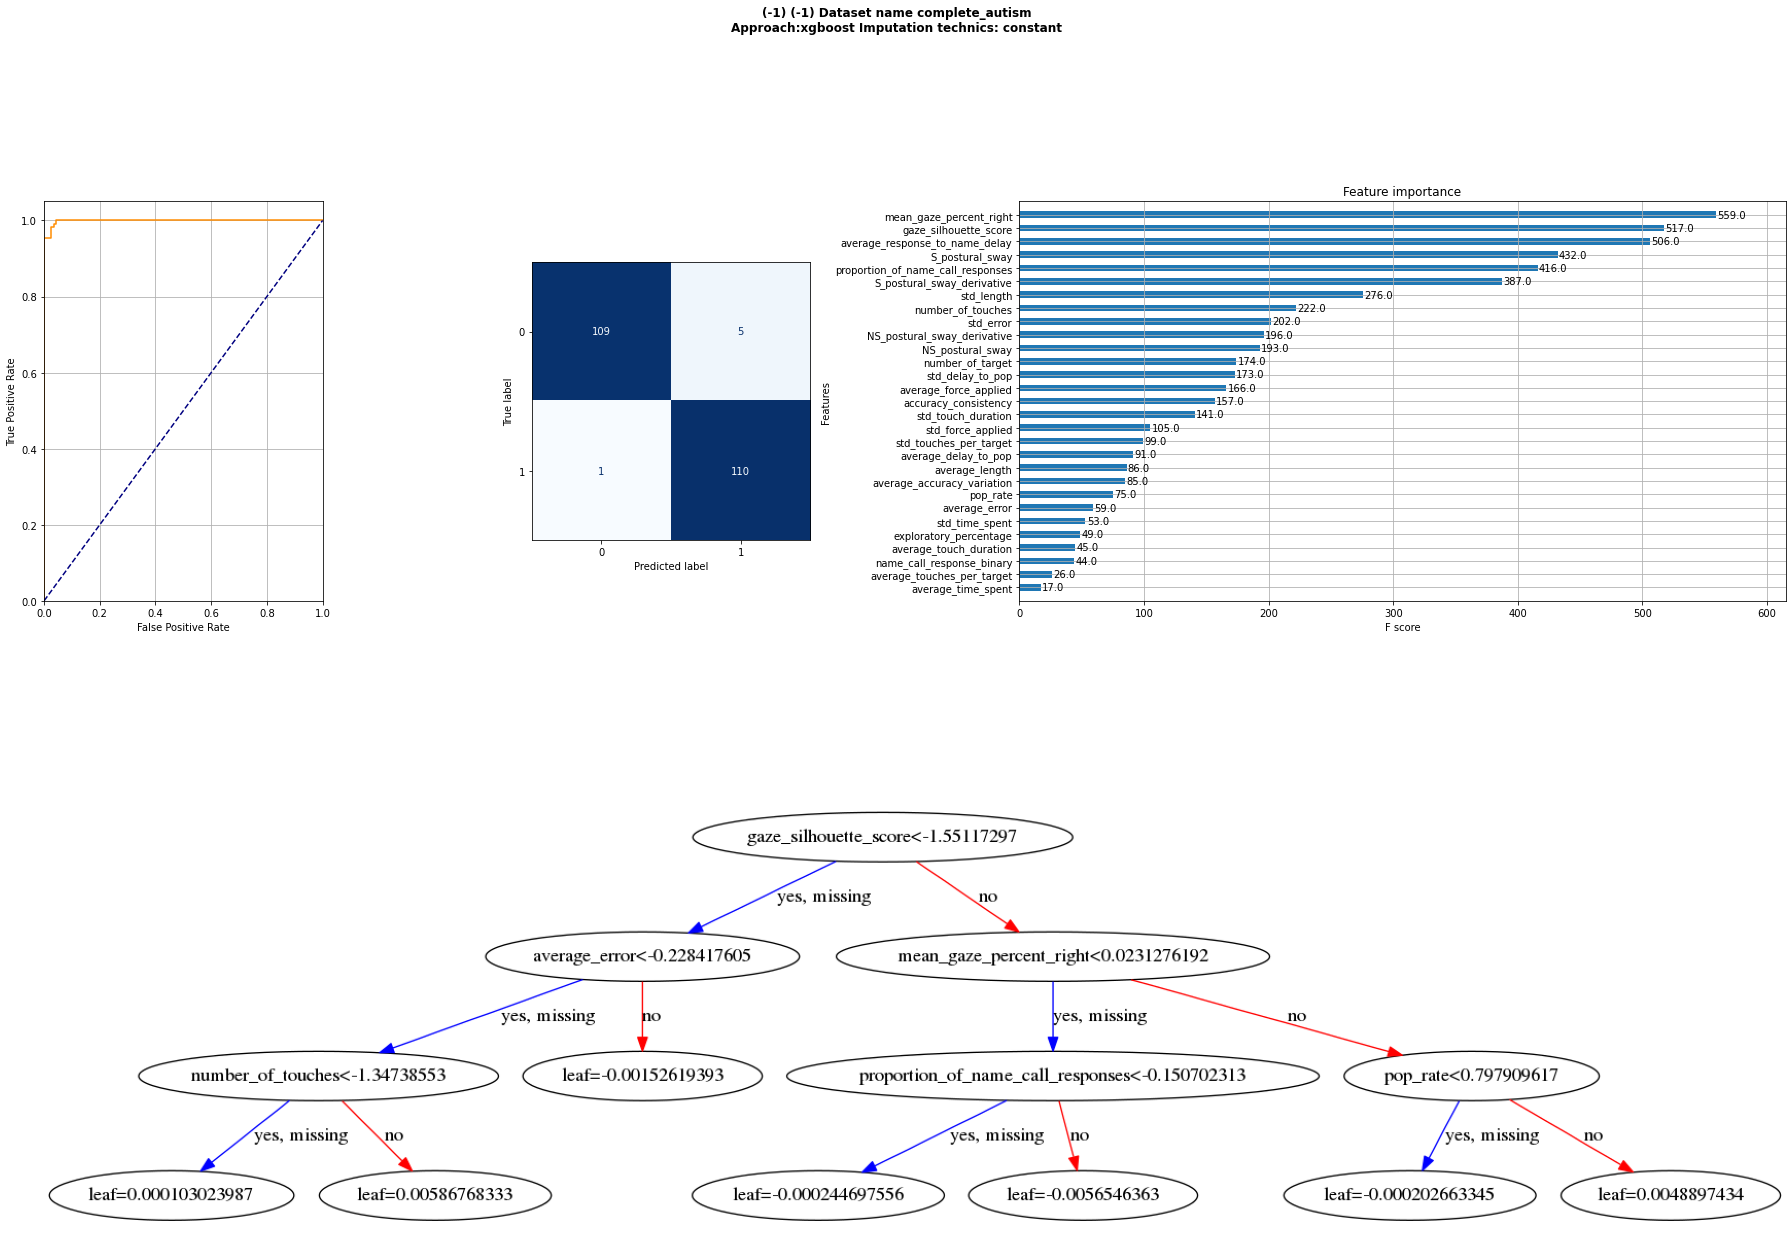

,AUROC,AUC-PR,AUC-PR-Gain,AUC-PR-Corrected,AUC-PR-Gain-Corrected,F1 score (2 PPVxTPR/(PPV+TPR)),F1 score Corrected,Accuracy,Matthews correlation coefficient (MCC),"Sensitivity, recall, hit rate, or true positive rate (TPR)","Specificity, selectivity or true negative rate (TNR)",Precision or positive predictive value (PPV),Negative predictive value (NPV),Miss rate or false negative rate (FNR),False discovery rate (FDR=1-PPV),False omission rate (FOR=1-NPV)
0,0.998,0.996,0.999,0.95,1.0,0.969,0.898,0.978,0.948,0.963,0.985,0.963,0.985,0.037,0.037,0.015


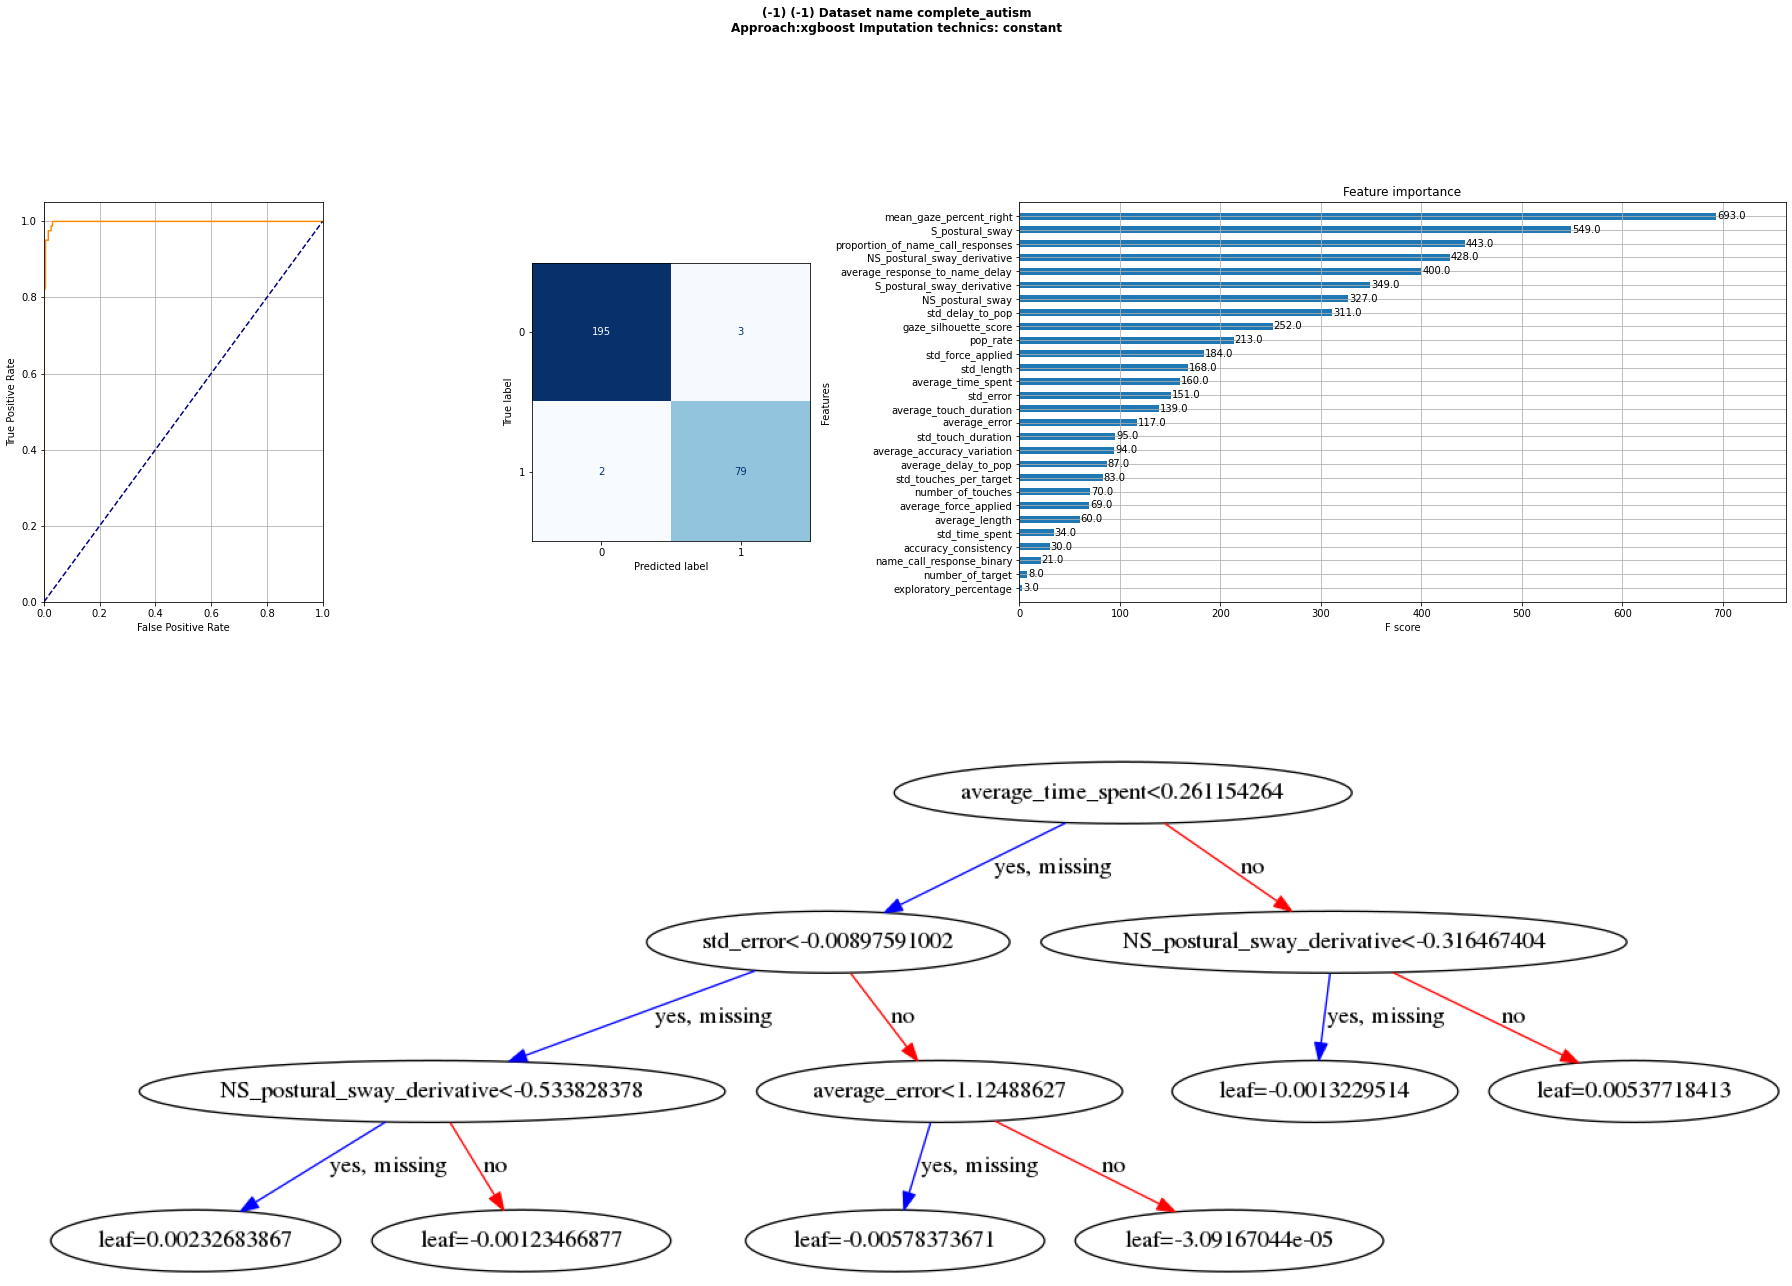

In [53]:
from interpret.glassbox import ExplainableBoostingClassifier

set_of_features  = {}
features_importance = pd.DataFrame(columns=DEFAULT_PREDICTORS)

for scenario in ['young', 'papers', 'all', 'asd_td_age_matched_n_balanced', 'asd_td_age_matched_n_unbalanced']:
    
    #df =  pd.read_csv("/Users/samperochon/Duke/work/notes_on_stats/df_all.csv")
    df =  pd.read_csv("/home01/sam/df_all.csv")
    data = Dataset(df=df, 
                   missing_data_handling='encoding', 
                   imputation_method='without', 
                   sampling_method='without',
                   outcome_column='diagnosis',
                    features_name = DEFAULT_PREDICTORS, 
                    scale_data=True,
                    use_missing_indicator_variables=False,
                   verbosity=0,
                   scenario=scenario,
                   proportion_train=1)
    
    exp = Experiments(data.dataset_name,
                  dataset=data, 
                    approach='xgboost', 
                    previous_experiment=None,        
                    verbosity=1, 
                    debug=True, 
                    save_experiment=False)
    
    exp.fit_predict()
    exp.plot()
    
    if exp.approach == 'ebm':

        # Store 15 best features for each scenario
        ebm_global = exp.model.explain_global()
        ordered_features = np.array(ebm_global.feature_names)[np.argsort(ebm_global._internal_obj['overall']['scores'])]
        ordered_features = [f for f in ordered_features if ' x ' not in f]

        set_of_features[scenario] = ordered_features[-15:]
        dict_feature_importance = {feature_name:score/np.max(ebm_global._internal_obj['overall']['scores']) for feature_name, score in zip(DEFAULT_PREDICTORS, ebm_global._internal_obj['overall']['scores']) }
        
    elif exp.approach == 'xgboost':
        
        scenario_feature_importance = pd.DataFrame(exp.model.get_booster().get_score(importance_type=importance_type, fmap=''), index=[scenario])
        features_importance = features_importance.append(scenario_feature_importance/scenario_feature_importance.max().max())

        set_of_features[scenario] = pd.DataFrame(exp.model.get_booster().get_score(importance_type=importance_type, fmap=''), index=[0]).transpose()[0].sort_values(ascending=False).index[:15]


    

In [55]:
features_importance_xgboost = features_importance.transpose()
features_importance_ebm = features_importance_ebm.transpose()

<AxesSubplot:>

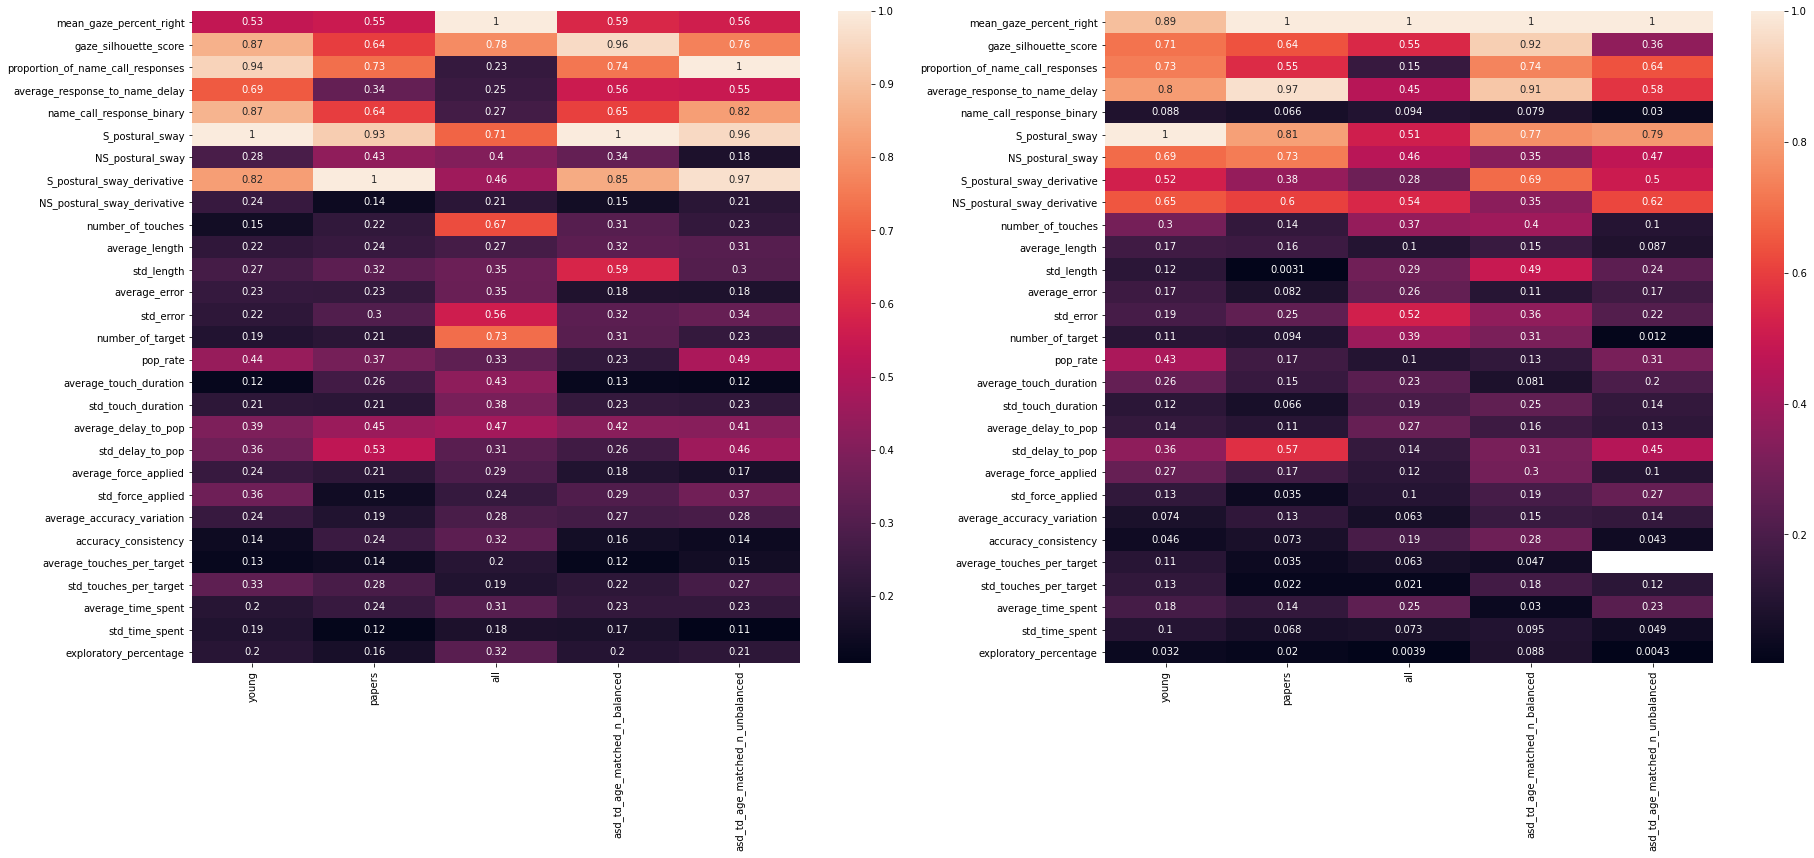

In [59]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 12))
sns.heatmap(features_importance_ebm, annot=True, ax=ax1)
sns.heatmap(features_importance_xgboost, annot=True, ax=ax2)
